# MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications
---
<br>


## Abstract
---
* 2017년 4월 17일 Google Inc.에서 발표한 논문.
* 기존까지의 정확도를 높이는 방법은 Network을 더 깊고 복잡하게 만드는 경향.
* 모바일과 같은 application(저용량 메모리 환경)에도 가능하도록 성능 저하를 최소화하면서 딥러닝 모델 파일의 크기를 줄이는 것이 목적.
* 경량화를 위해서 Depthwise seperable convolutions 사용.
<br>

## Depthwise seperable convolutions
---
* Depthwise seperable convolutions
    * Depthwise Convolution 연산 이후 Pointwise Convolution 연산을 하는 Convolution 연산.
* 각 입력 채널에 대해 같은 크기가 연산을 수행하여 하나의 피처맵을 생성
    * N개의 채널이 입력 채널이면 N의 Feature map이 생성.  
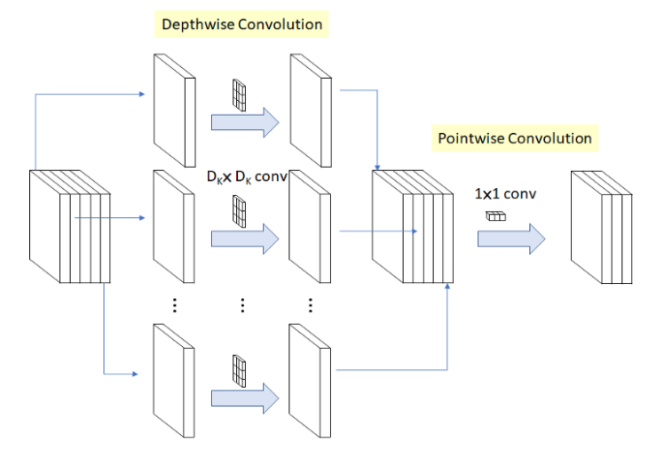

### 계산량  
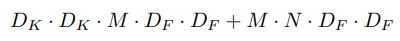  
* Dk = input kernel 크기, M = input 채널 수,  Df는 Feature map의 크기.
<br>

### Depthwise Convolution vs Convolution 연산.
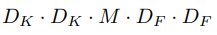  
<br>

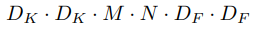    
* Dk = input kernel 크기, M = input 채널 수, N = output 채널 수, Df는 Feature map의 크기.

### 계산량 비교
* 입력 층 10x255x255
* Feature map 3x3
* 출력 층 5

* Convoluiton 계산량 = 10x255x255 x 3x3 x 5
* Depthwise Convolution 계산량  = 10x255x255 x 3x3
* **출력층에 따라 계산량이 달라짐**

### Pointwise convolutions
---
* Pointwise convolution은 Depthwise Convolution이 생성한 Feature map들을 1x1 con 층으로 채널 수를 조절.
    * 출력 채널들을 interaction하여 더 복잡한 기능들 학습 가능.
    * 실제 이미지나 데이터의 중요한 정보들은 하나의 채널에 나오는 것이 아니라 여러 채널에 걸쳐 나타남(RGB - Purple).
* 앞의 Depthwise Convolution이 고유 Feature를 추출하고 Pointwise convolution은 정보를 경합하여 더 복잡하고 정교한 Feature로 생성.

### Depthwise Seperable Convolution vs Convolution 연산.   
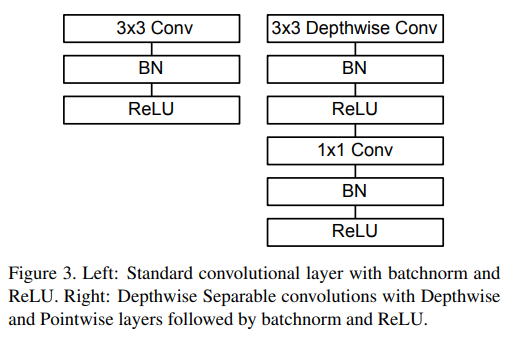  
* 기본적인 Batch Normalization과 Relu가 포함된 Convolution 연산.
* Depthwise Seperable Convolution의 연산량   
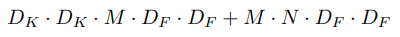
* Convolution의 연산량  
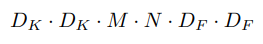

* 계산량 비교  
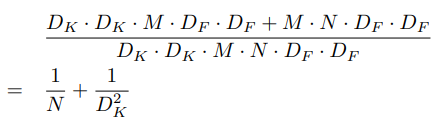
* Moblienet에서는 3x3의 depthwise seperabel convolution을 사용하기 때문에 8~9배 더 적은 연산량을 가지게 된다.

* 기본적으로 Convolution은 각 channel에 대해 Filtering을 하고 필요한 정보만 뽑아 새로운 Feature map을 만들어 냄.(1단계)
* Depthwise Seperable Convolution은 Filtering을 하고 내가 원하는 방식으로 다시 조합해서 새로운 Feature map을 만들어 냄.(2단계)

## MoblieNet 구조
---
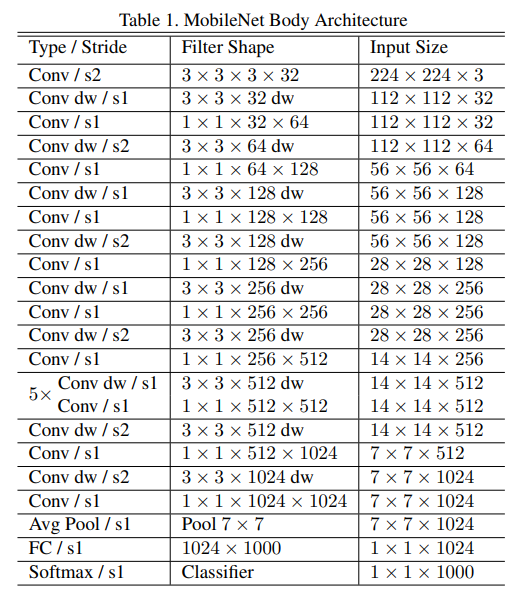
* 각 요소가 사용하는 Resource량  
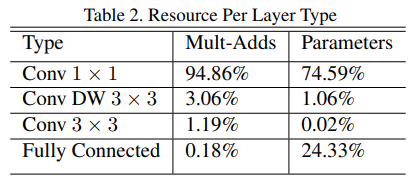
* 1x1이 전체 연산으 약 95%, 파리미터 비율은 75%정도로 차지.

* Multi-adds : 더하기 + 곱셈 연산의 총량.
* FLOPs(Floating Pointing Operations) : 부동 소수점 연산.

## 비교  
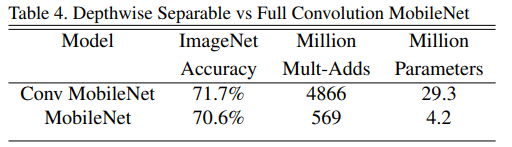  
<br>

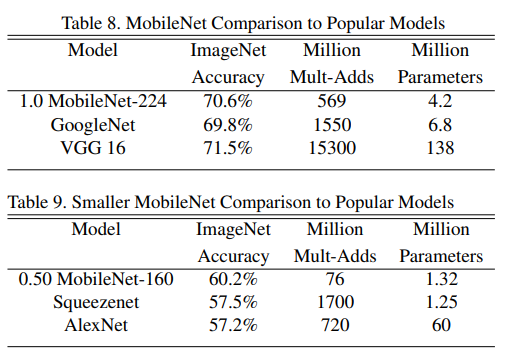

## More 발전성.
---
* Mobilenet은 경량화가 이미 많이 되었지만, 상황에 따라서 더 경량화된 Network가 필요로 될 수 있음.
* Width Multiplier, Resolution Multiplier에 대해 사용.

### Width Multiplier
---
* Thinner Model
    * 입력과 출력층의 두께를 결정.
    * 입력, 출력 채널을 a배 만큼 축소함.
    * a는 0~1 사이의 값을 가짐.
* 변경된 식  
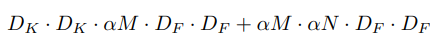
* Roughly $a^2$만큼 계산량 감소  
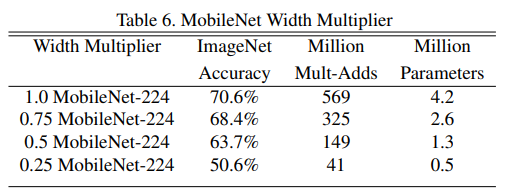


### Resolution Multiplier
---
* Reduced Representation
    * 모델의 연산량을 감소시키기 위해 사용.
    * P를 통해 입력 이미지의 해상도를 낮춤
    * P는 0~1의 값을 가짐.
* 변경된 식
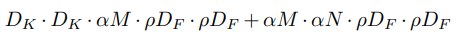

* Width Multiplier와 Resolution Multiplier까지 적용.  
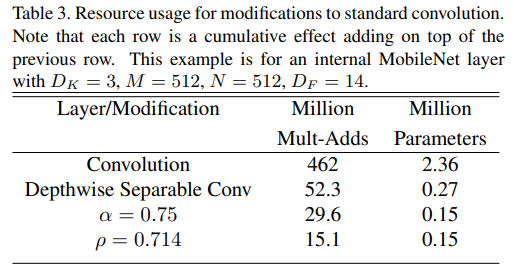

* Resolution Multiplier 정도 비교.  
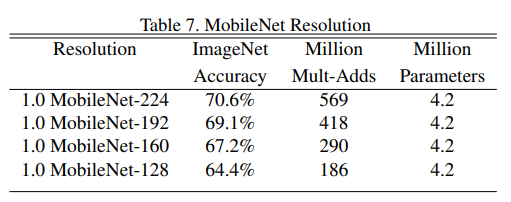

## Result
---
* 계산량에 따른 결과    
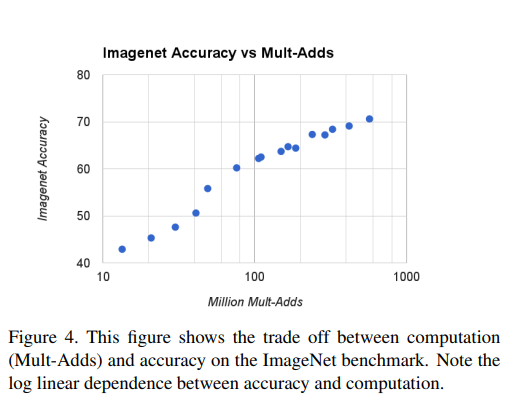

* 하이퍼파리미터에 따른 결과  

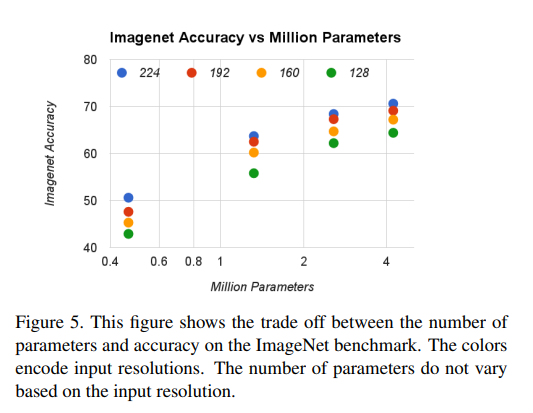

* 결과  
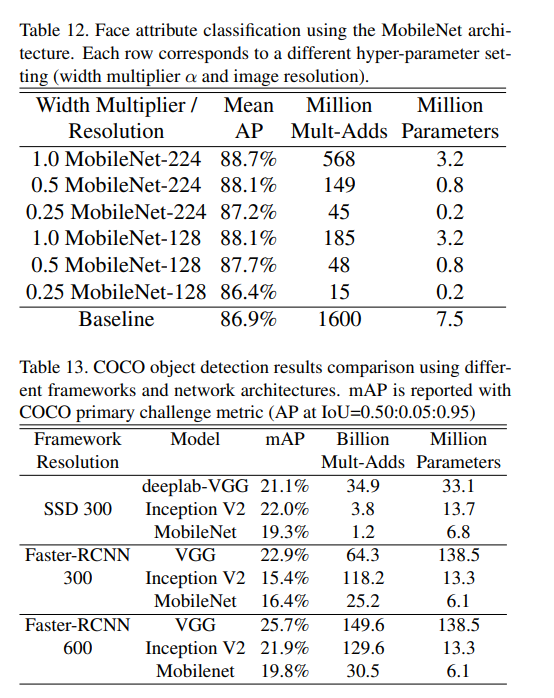
